In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from numpy import random

In [2]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [3]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
data.iloc[:,0] = data.iloc[:,0].map(label)

In [5]:
x = data.drop(data.columns[0],axis=1) # Droping the label column
y = data.iloc[:,0].copy() # Copying the label column

In [6]:
x = np.array(x)
y = np.array(y)

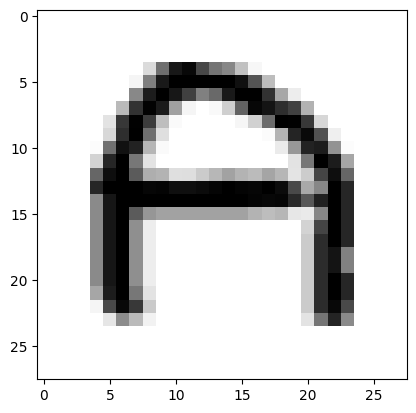

In [7]:
sample_data = x[3000]
sample_image = sample_data.reshape(28, 28)
plt.imshow(sample_image, cmap=cm.binary, interpolation="nearest")
plt.show()

In [11]:
y[3000]

'A'

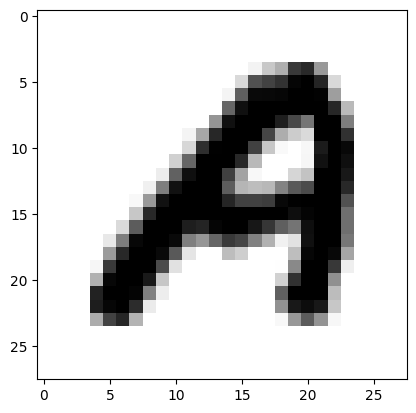

In [8]:
sample_data = x[3001]
sample_image = sample_data.reshape(28, 28)
plt.imshow(sample_image, cmap=cm.binary, interpolation="nearest")
plt.show()

In [10]:
y[3001]

'A'

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)

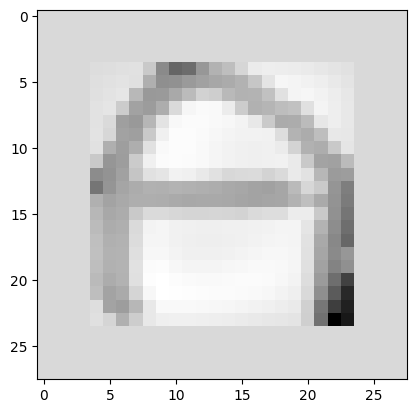

In [8]:
sample_data = x[3000]
sample_image = sample_data.reshape(28, 28)
plt.imshow(sample_image, cmap=cm.binary, interpolation="nearest")
plt.show()

In [9]:
y[3000]

'A'

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 42)
x_train.shape,x_test.shape

((297960, 784), (74490, 784))

# Model training

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 1,weights = 'distance')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [12]:
y_pred = knn_model.predict(x_test)

In [13]:
print("The accuracy of model is : ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

The accuracy of model is :  0.9840112766814337


array([[ 2740,     0,     0,     0,     0,     0,     0,     4,     0,
            0,     3,     1,     0,     2,     0,    10,     1,     7,
            0,     2,     1,     0,     0,     0,     2,     1],
       [    6,  1626,     5,    16,     2,     0,     6,     0,     0,
            1,     0,     1,     0,     0,    14,    24,     0,     9,
           21,     0,     2,     0,     0,     0,     0,     1],
       [    0,     0,  4657,     0,     4,     2,     1,     0,     0,
            0,     0,     1,     0,     0,    12,     3,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0],
       [    1,     2,     0,  1948,     0,     0,     0,     0,     0,
            4,     0,     2,     0,     0,    62,     5,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     1],
       [    2,     7,    21,     1,  2210,    13,     0,     0,     1,
            0,     0,    20,     0,     0,     2,     2,     0,     2,
            3,     0,     0,  

# Results

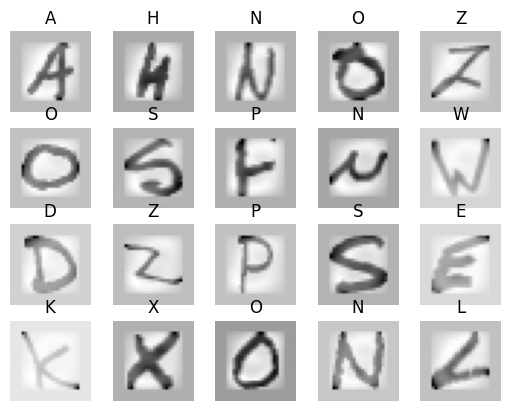

In [14]:
for i in range(1,21):
    a = random.randint(len(x_test))
    img = x_test[a]
    img_res = img.reshape(28,28)
    plt.subplot(4,5,i)
    plt.imshow(img_res, cmap='binary')
    plt.axis('off')
    plt.title(y_test[a])
plt.show()

# PCA 

In [15]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Select the desired number of components
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [16]:
knn_model.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [17]:
y_pred = knn_model.predict(X_test_pca)

In [18]:
print("The accuracy of model in PCA is : ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

The accuracy of model in PCA is :  0.9865216807625184


array([[ 2739,     3,     0,     0,     0,     1,     0,     7,     0,
            0,     2,     0,     5,     1,     0,     2,     1,    10,
            0,     0,     0,     0,     0,     2,     0,     1],
       [   12,  1654,     0,     5,    14,     0,     4,     2,     0,
            0,     0,     1,     1,     0,    10,     3,     0,     8,
           18,     0,     0,     0,     0,     0,     0,     2],
       [    0,     0,  4650,     0,     4,     2,     1,     0,     0,
            0,     0,     5,     0,     0,    17,     1,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0],
       [    1,     0,     0,  1964,     0,     0,     0,     0,     0,
            2,     0,     0,     0,     0,    48,     8,     0,     1,
            2,     0,     1,     0,     0,     0,     0,     0],
       [    2,    11,    10,     1,  2234,     3,     1,     0,     0,
            0,     0,    14,     0,     0,     0,     2,     0,     5,
            5,     0,     0,  

# LDA

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2)  
X_train_lda = lda.fit_transform(x_train, y_train)
X_test_lda = lda.transform(x_test)

In [22]:
knn_model.fit(X_train_lda,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [23]:
y_pred = knn_model.predict(X_test_lda)

In [24]:
print("The accuracy of model in LDA is : ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

The accuracy of model in LDA is :  0.8253859578466908


array([[ 2092,    24,    14,     4,    44,     8,     3,    38,     0,
            5,    29,    17,    78,    86,    11,    62,     8,    45,
            8,    15,    53,    45,    61,     9,     6,     9],
       [   20,  1281,    50,    26,    72,     0,    14,     4,     3,
           23,     6,    42,     6,    10,     6,    13,    16,     4,
           54,    10,    27,     0,     7,    10,    17,    13],
       [   11,    48,  4029,    63,    27,     0,    74,     2,     0,
           35,     4,    74,     6,     8,   147,     3,    34,     1,
           59,     2,    44,     0,     0,     0,     8,     3],
       [    2,    24,    91,  1545,    11,     0,    24,     2,     1,
           20,     1,    39,     2,     0,   115,     6,    25,     2,
           22,     8,    68,     0,     2,     0,    13,     4],
       [   40,    33,    34,    19,  1771,     0,     5,     6,     0,
           13,     8,    51,    12,    10,     9,    69,    15,    31,
           43,    26,    20,  